Double Layer Capacitance (F/cm^2) of TiO2/ 0.00022388172244762009
Double Layer Capacitance (F/cm^2) of ZrO2/ 0.00019828895765298935
Average capacitative current at 1.1 V for 5 mV/s: 0.004783667483474991
Average capacitative current at 1.1 V for 5 mV/s: 0.006219252028627165
Average capacitative current at 1.1 V for 5 mV/s: 0.018239659770352606
Average capacitative current at 1.1 V for 5 mV/s: 0.031238991264789767
Average capacitative current at 1.1 V for 5 mV/s: 0.05477557181103229
Average capacitative current at 1.1 V for 5 mV/s: 0.07689951226166007
Average capacitative current at 1.1 V for 5 mV/s: 0.12113218228771665
Double Layer Capacitance (F/cm^2) of CeO2/ 0.00023694487969508007


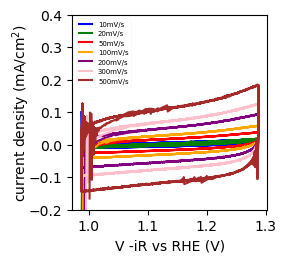

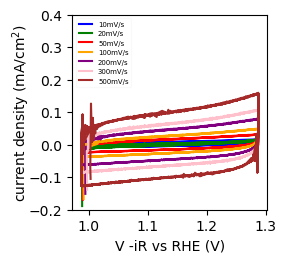

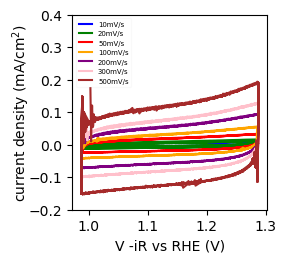

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sys
from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist
from impedance import preprocessing


length = 8
height = 8

axes_l1 = 1.95
axes_l4 = axes_l1*1.5+0.35
axes_l6 = axes_l1*1.2
axes_l8a = axes_l1*0.4

axes_w1 = axes_l1
axes_w8a = axes_l1*0.4

x_offset = 0.7
y_offset = axes_w1/4

label_font = 10
legend_font = 5

folders=['TiO2/','ZrO2/']
files=[['10.txt',10, '10mV/s','blue'],['20.txt',20, '20mV/s','green']\
       ,['50.txt',50, '50mV/s','red'],['100.txt',100, '100mV/s','orange']\
       ,['200.txt',200, '200mV/s','purple'],['300.txt',300, '300mV/s','pink'],['500.txt',500, '500mV/s','brown']]

scan_rates=np.array([])
average_capacitative_currents=np.array([])
for folder in folders:

    scan_rates=np.array([])
    average_capacitative_currents=np.array([])
    fig = plt.figure(figsize=(length, height))


    axes1 = fig.add_axes([(x_offset)/length, \
                          (3*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-left
    
    for file, scan_rate, label, color in files:

        filename = folder+file
        data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=1, encoding='ISO-8859-1')
        voltage = np.array(data.iloc[:,0]+0.059*14+0.098) #voltage in V
        current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2
        
        #iR correction - average solution resistance obtained from Nyquist fit is substracted
    
        voltage = voltage - current_density*0.196*5.2*0.001
        target_voltage = 1.1
        indices = np.where(np.abs(voltage - target_voltage) < 0.001)  # Adjust the tolerance as needed
        capacitative_currents = np.abs(current_density[indices])
        average_capacitative_current = np.mean(capacitative_currents) # Calculate the average capacitative current
        scan_rates = np.append(scan_rates,scan_rate)
        average_capacitative_currents = np.append(average_capacitative_currents,average_capacitative_current)
        axes1.plot(voltage,current_density,\
                 label=label,color=color)

    #print(average_capacitative_currents)
    np.savetxt(folder+'ecsa.txt',np.column_stack((scan_rates,average_capacitative_currents)))
    axes1.legend(fontsize=legend_font, framealpha=0.1, loc='upper left')
    
    axes1.set_ylim(-0.2,0.4)
    axes1.set_xlabel('V -iR vs RHE (V)',fontsize=label_font)
    axes1.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=-2)
    
    # for axes 2 - Tafel slope
    
    slope, intercept = np.polyfit(scan_rates, average_capacitative_currents, 1)
    fit_line = slope * scan_rates + intercept
    print("Double Layer Capacitance (F/cm^2) of "+folder,slope)
    
    plt.savefig(folder+'ecsa.pdf',dpi=300, bbox_inches='tight')

folders=['CeO2/']
files=[['10.txt',10, '10mV/s','blue'],['20.txt',20, '20mV/s','green']\
       ,['50.txt',50, '50mV/s','red'],['100.txt',100, '100mV/s','orange']\
       ,['200.txt',200, '200mV/s','purple'],['300.txt',300, '300mV/s','pink'],['500.txt',500, '500mV/s','brown']]
scan_rates=np.array([])
average_capacitative_currents=np.array([])
for folder in folders:
    fig = plt.figure(figsize=(length, height))


    axes1 = fig.add_axes([(x_offset)/length, \
                          (3*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-left
    for file, scan_rate, label, color in files:

        filename = folder+file
        data = pd.read_csv(filename, delimiter='\t', decimal=',', skiprows=59, encoding='ISO-8859-1')
        voltage = np.array(data.iloc[:,0]+0.059*14+0.098) #voltage in V
        current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2
        
        #iR correction - average solution resistance obtained from Nyquist fit is substracted
    
        voltage = voltage  - current_density*0.196*5.2*0.001
        target_voltage = 1.1
        indices = np.where(np.abs(voltage - target_voltage) < 0.001)  # Adjust the tolerance as needed
        capacitative_currents = np.abs(current_density[indices])
        average_capacitative_current = np.mean(capacitative_currents) # Calculate the average capacitative current
        print("Average capacitative current at 1.1 V for 5 mV/s:", average_capacitative_current)
        scan_rates = np.append(scan_rates,scan_rate)
        average_capacitative_currents = np.append(average_capacitative_currents,average_capacitative_current)
        axes1.plot(voltage,current_density,\
                 label=label,color=color)

    np.savetxt(folder+'ecsa.txt',np.column_stack((scan_rates,average_capacitative_currents)))
    axes1.legend(fontsize=legend_font, framealpha=0.1, loc='upper left')
    
    
    axes1.set_xlabel('V -iR vs RHE (V)',fontsize=label_font)
    axes1.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=-2)
    axes1.set_ylim(-0.2,0.4)
    # for axes 2 - Tafel slope
    
    slope, intercept = np.polyfit(scan_rates, average_capacitative_currents, 1)
    fit_line = slope * scan_rates + intercept
    print("Double Layer Capacitance (F/cm^2) of "+folder,slope)
   
    plt.savefig(folder+'ecsa.pdf',dpi=300, bbox_inches='tight')
plt.show()